In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fastf1 as ff
from fastf1 import plotting, utils

# NEED TO DO
* change the data to laps 45 & 46!
* re-plot everything

In [5]:
# ff.Cache.enable_cache('Users/amos/Downloads')
plotting.setup_mpl()

In [6]:
silverston_race = ff.get_session(2022,'Silverston','R')

In [7]:
laps = silverston_race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for British Grand Prix - Race [v2.1.13]
api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver  1: Ignoring late data for a previously processed lap.The data may contain errors (previous: 39; current 40)
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
utils          INFO 	NumExpr defaulting to 8 threads.
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Drive

In [73]:
HAM = laps.pick_driver('HAM')
PER = laps.pick_driver('PER')
LEC = laps.pick_driver('LEC')
SAI = laps.pick_driver('SAI')

In [90]:
laps_PER = PER.loc[PER['LapNumber'] == 45]
laps_LEC = LEC.loc[LEC['LapNumber'] == 45]
laps_HAM = HAM.loc[HAM['LapNumber'] == 45]
laps_SAI = SAI.loc[SAI['LapNumber'] == 45]

laps_PER46 = PER.loc[PER['LapNumber'] == 46]
laps_LEC46 = LEC.loc[LEC['LapNumber'] == 46]
laps_HAM46 = HAM.loc[HAM['LapNumber'] == 46]
laps_SAI46 = SAI.loc[SAI['LapNumber'] == 46]

In [91]:
lap_telemetry_per = laps_PER.get_car_data().add_distance().add_driver_ahead()
lap_telemetry_ham = laps_HAM.get_car_data().add_distance().add_driver_ahead()
lap_telemetry_lec = laps_LEC.get_car_data().add_distance().add_driver_ahead()
lap_telemetry_sai = laps_SAI.get_car_data().add_distance().add_driver_ahead()

lap_telemetry_per46 = laps_PER46.get_car_data().add_distance().add_driver_ahead()
lap_telemetry_ham46 = laps_HAM46.get_car_data().add_distance().add_driver_ahead()
lap_telemetry_lec46 = laps_LEC46.get_car_data().add_distance().add_driver_ahead()
lap_telemetry_sai46 = laps_SAI46.get_car_data().add_distance().add_driver_ahead()

In [59]:
delta_time, ref_tel, compare_tel = utils.delta_time(laps_PER, laps_LEC)
delta_time1, ref_tel1, compare_tel1 = utils.delta_time(laps_PER, laps_HAM)
delta_time = delta_time[2:]
delta_time1 = delta_time1[2:]

In [92]:
delta_time, ref_tel, compare_tel = utils.delta_time(laps_PER46,laps_SAI46)
delta_time1, ref_tel1, compare_tel1 = utils.delta_time(laps_LEC46,laps_SAI46)
delta_time2, ref_tel2, compare_tel2 = utils.delta_time(laps_HAM46,laps_SAI46)

In [93]:
delta_time = delta_time[2:]
delta_time1 = delta_time1[2:]
delta_time2 = delta_time2[2:]

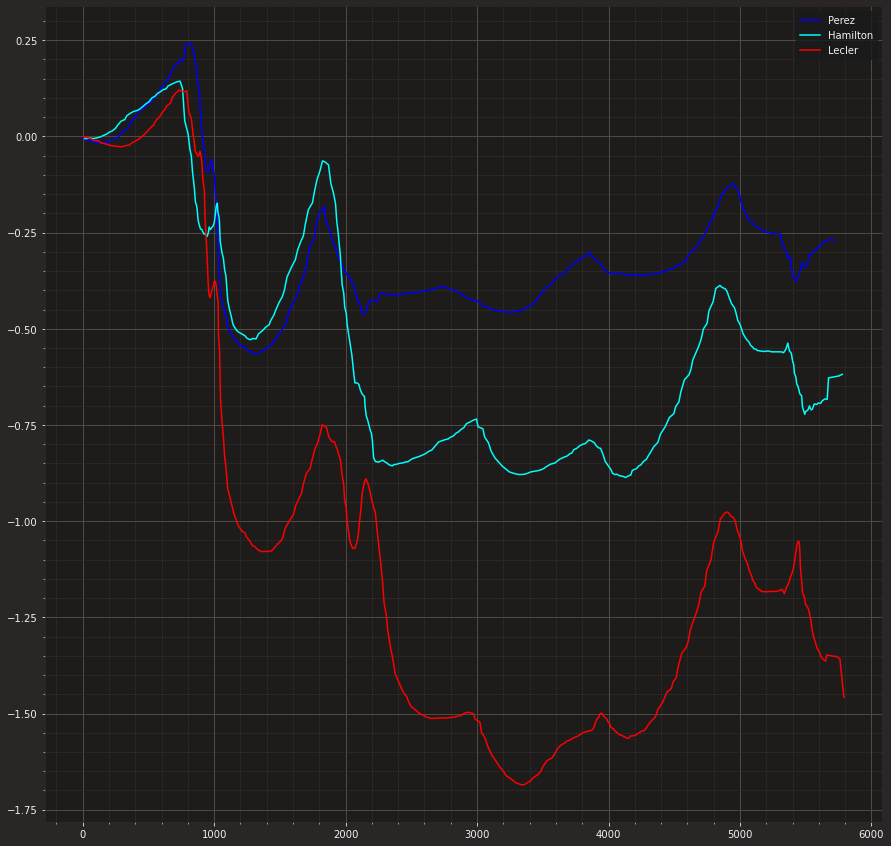

In [95]:
fig1, ax1 = plt.subplots()

ax1.plot(lap_telemetry_per46['Distance'],delta_time,label='Perez',color='blue')
ax1.plot(lap_telemetry_lec46['Distance'],delta_time1,label='Hamilton',color='cyan')
ax1.plot(lap_telemetry_ham46['Distance'],delta_time2,label='Lecler',color='red')
ax1.legend()
plt.show()

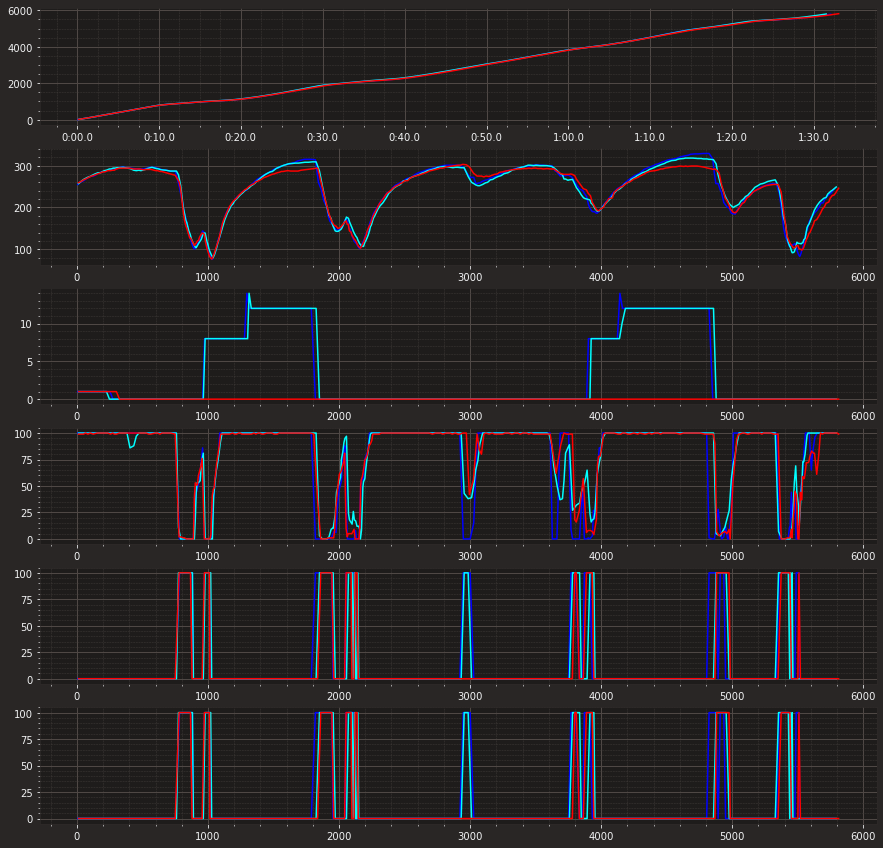

In [71]:
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(6)

ax[0].plot(lap_telemetry_per['Time'],lap_telemetry_per['Distance'],label='Perez',color='blue')
ax[0].plot(lap_telemetry_ham['Time'],lap_telemetry_ham['Distance'],label='Hamilton',color='cyan')
ax[0].plot(lap_telemetry_lec['Time'],lap_telemetry_lec['Distance'],label='Lecler',color='red')
# ax[0].plot(lap_telemetry_per['Distance'],delta_time1,label='Perez',color='blue')

ax[1].plot(lap_telemetry_per['Distance'],lap_telemetry_per['Speed'],label='Perez',color='blue')
ax[1].plot(lap_telemetry_ham['Distance'],lap_telemetry_ham['Speed'],label='Hamilton',color='cyan')
ax[1].plot(lap_telemetry_lec['Distance'],lap_telemetry_lec['Speed'],label='Lecler',color='red')

ax[2].plot(lap_telemetry_per['Distance'],lap_telemetry_per['DRS'],label='Perez',color='blue')
ax[2].plot(lap_telemetry_ham['Distance'],lap_telemetry_ham['DRS'],label='Hamilton',color='cyan')
ax[2].plot(lap_telemetry_lec['Distance'],lap_telemetry_lec['DRS'],label='Lecler',color='red')

ax[3].plot(lap_telemetry_per['Distance'],lap_telemetry_per['Throttle'],label='Perez',color='blue')
ax[3].plot(lap_telemetry_ham['Distance'],lap_telemetry_ham['Throttle'],label='Hamilton',color='cyan')
ax[3].plot(lap_telemetry_lec['Distance'],lap_telemetry_lec['Throttle'],label='Lecler',color='red')

ax[4].plot(lap_telemetry_per['Distance'],lap_telemetry_per['Brake'],label='Perez',color='blue') 
ax[4].plot(lap_telemetry_ham['Distance'],lap_telemetry_ham['Brake'],label='Hamilton',color='cyan')
ax[4].plot(lap_telemetry_lec['Distance'],lap_telemetry_lec['Brake'],label='Lecler',color='red')

ax[5].plot(lap_telemetry_per['Distance'],lap_telemetry_per['Brake'],label='Perez',color='blue')
ax[5].plot(lap_telemetry_ham['Distance'],lap_telemetry_ham['Brake'],label='Hamilton',color='cyan')
ax[5].plot(lap_telemetry_lec['Distance'],lap_telemetry_lec['Brake'],label='Lecler',color='red')